# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [385]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [386]:
#On importe les données dans un dataframe
df_historique_immobilier_paris_2017_2021 = pd.read_excel("historique_immobilier_paris_2017_2021.xlsx")
df_historique_immobilier_paris_2017_2021.head(6)
#df_portefeuille_actifs =pd.read_excel("portefeuille_actifs.xlsx")
#df_portefeuille_actifs.head(10) 

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15
5,2017-01-06,3.845522e+05,27,RUE DU COLISEE,75008,Paris 8e Arrondissement,2,Appartement,39


In [387]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_historique_immobilier_paris_2017_2021.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_historique_immobilier_paris_2017_2021.shape[1]))

Le tableau comporte 26196 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [388]:
#On vérifie que le type des données attribué par pandas est cohérent
types_de_donnees = df_historique_immobilier_paris_2017_2021.dtypes
# Afficher les types de données
print(types_de_donnees)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


In [389]:
# Obtenir le nombre de valeurs non-nulles dans chaque colonne
df_historique_immobilier_paris_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [390]:
df_historique_immobilier_paris_2017_2021.describe()

,date_mutation,valeur_fonciere,adresse_numero,code_postal,code_type_local,surface_reelle
count,26196,2.619600e+04,26196.000000,26196.000000,26196.000000,26196.000000
mean,2019-06-09 14:09:14.099862784,4.916170e+05,47.449572,75012.716216,2.140709,46.859940
min,2017-01-02 00:00:00,8.519470e+04,1.000000,75001.000000,2.000000,11.000000
25%,2018-03-14 00:00:00,2.339439e+05,10.000000,75009.000000,2.000000,23.000000
50%,2019-05-23 00:00:00,3.545774e+05,27.000000,75014.000000,2.000000,35.000000
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,75017.000000,2.000000,55.000000
max,2021-12-31 00:00:00,3.843359e+07,407.000000,75020.000000,4.000000,3945.000000
std,NaN,5.713292e+05,55.733432,5.269150,0.511496,52.408062


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [391]:
type_local= df_historique_immobilier_paris_2017_2021['type_local'].unique()
print("la liste des différents types de biens immobiliers que nous avons dans les données est ?:", type_local)


la liste des différents types de biens immobiliers que nous avons dans les données est ?: ['Appartement' 'Local industriel. commercial ou assimilé']


In [392]:
code_type_local = df_historique_immobilier_paris_2017_2021['code_type_local'].unique()
print(code_type_local)

[2 4]


On observe qu'il y a ? 2 types de biens, et que leurs codes types sont ? 2 et 4. 

### 3. Nombre de transactions

In [393]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nombre_total_transactions = len(df_historique_immobilier_paris_2017_2021)
print(f"le nombre de transactions dans les données est: {nombre_total_transactions}")


le nombre de transactions dans les données est: 26196


In [394]:
nombre_transactions_appartements = len(df_historique_immobilier_paris_2017_2021[df_historique_immobilier_paris_2017_2021["type_local"] == "Appartement"])
print(f'le nombre de transactions pour les appartements dans les données est:{nombre_transactions_appartements}')


le nombre de transactions pour les appartements dans les données est:24353


In [395]:
nombre_transactions_locaux_commerciaux = len(df_historique_immobilier_paris_2017_2021[df_historique_immobilier_paris_2017_2021["type_local"] == "Local industriel. commercial ou assimilé"])
print(f'le nombre de transactions pour les locaux commerciaux dans les données est: {nombre_transactions_locaux_commerciaux}')

le nombre de transactions pour les locaux commerciaux dans les données est: 1843


### 4. interval de l'historique des données

In [396]:
#On vérifie également la plage de l'historique disponible
# Trouver la première et la dernière date
premiere_date = df_historique_immobilier_paris_2017_2021['date_mutation'].min()
print(f'la première date de transaction dans les données est le {premiere_date.date()}')

derniere_date = df_historique_immobilier_paris_2017_2021['date_mutation'].max()
print(f'la dernière date de transaction dans les données est le {derniere_date.date()}')

la première date de transaction dans les données est le 2017-01-02
la dernière date de transaction dans les données est le 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [397]:
# Calcul de la colonne prix_m2

df_historique_immobilier_paris_2017_2021['prix_m2'] = (df_historique_immobilier_paris_2017_2021['valeur_fonciere'] / df_historique_immobilier_paris_2017_2021['surface_reelle']).round(2)

display(df_historique_immobilier_paris_2017_2021[['valeur_fonciere', 'surface_reelle', 'prix_m2']].head())

,valeur_fonciere,surface_reelle,prix_m2
0,5.505597e+05,50,11011.19
1,1.576492e+06,163,9671.73
2,6.577574e+05,66,9966.02
3,2.500868e+05,22,11367.58
4,1.762667e+05,15,11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [398]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
# Filtrer uniquement les appartements sans supprimer les colonnes
df_appartements = df_historique_immobilier_paris_2017_2021[df_historique_immobilier_paris_2017_2021['type_local'] == 'Appartement']

# Afficher les premières lignes pour vérifier
display(df_appartements.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


In [399]:
print("Le tableau comporte {} observation(s) ou article(s)".format(df_appartements.shape[0]))

Le tableau comporte 24353 observation(s) ou article(s)


In [400]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# Extraire l'année de la date de mutation
df_historique_immobilier_paris_2017_2021['année'] = pd.to_datetime(df_historique_immobilier_paris_2017_2021['date_mutation']).dt.year

# Filtrer les données pour ne garder que les appartements
df_appartements = df_historique_immobilier_paris_2017_2021[df_historique_immobilier_paris_2017_2021['type_local'] == 'Appartement']

#Calculer la moyenne du prix de vente et de la surface réelle par année
df_annee_prix_surface = df_appartements.groupby('année').agg(
    prix_moyen_vente=('valeur_fonciere', 'mean'),
    surface_moyenne=('surface_reelle', 'mean')
).reset_index().round(2)

# Afficher le résultat
display(df_annee_prix_surface.head())


,année,prix_moyen_vente,surface_moyenne
0,2017,427963.24,44.63
1,2018,448055.76,44.27
2,2019,461950.06,43.36
3,2020,462383.25,42.90
4,2021,458771.51,43.48


On constate sur la moyenne des prix de vente des appartements à Paris que ? Les prix augmentent progressivement chaque année de 2017 à 2020.
En 2021, on observe une légère baisse par rapport à 2020 (~3 600 € de moins).
Nous allons créer un graphique pour mieux le visualiser.

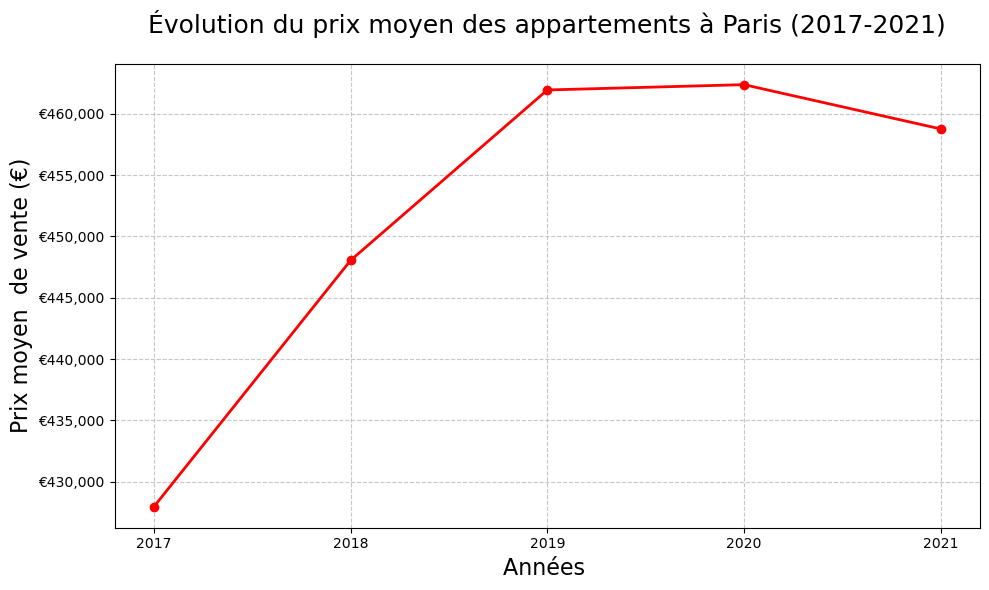

In [401]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Données (extraites de votre DataFrame)
annees = ['2017', '2018', '2019', '2020', '2021']
prix_moyens = [427963.238883, 448055.762541, 461950.057064, 462383.253604, 458771.507203]

# Création du graphique
plt.figure(figsize=(10, 6))  # J'ai réduit la hauteur pour un meilleur affichage

# Tracé de la courbe avec les données réelles
plt.plot(annees, prix_moyens, marker='o', linestyle='-', color='r', linewidth=2)

# Personnalisation des axes et du titre
plt.xlabel('Années ', fontsize=16)
plt.ylabel('Prix moyen  de vente (€)', fontsize=16)  # J'ai modifié le label pour correspondre aux données
plt.title('Évolution du prix moyen des appartements à Paris (2017-2021)', fontsize=18, pad=22)

# Formatage de l'axe Y en euros
formatter = ticker.StrMethodFormatter('€{x:,.0f}')  # Meilleur format pour les grands nombres
plt.gca().yaxis.set_major_formatter(formatter)

# Ajout de grille et ajustement des marges
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [402]:
#Liste des codes postaux dans nos données.
liste_code_postal= df_historique_immobilier_paris_2017_2021['code_postal'].unique()
print("la liste des différents code posteaux que nous avons dans les données est:", liste_code_postal)


la liste des différents code posteaux que nous avons dans les données est: [75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [403]:
display(df_appartements.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,année
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19,2017
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73,2017
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02,2017
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58,2017
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11,2017


In [404]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

# 2. Calcule du prix moyen par arrondissement et par année
prix_moyen_par_arrondissement = df_appartements.groupby(['code_postal', 'année'])['valeur_fonciere'].mean().unstack()

# 3. Calcule de l'évolution 2017-2021 en euros et en pourcentage
prix_moyen_par_arrondissement['evolution_absolue_€'] = prix_moyen_par_arrondissement[2021] - prix_moyen_par_arrondissement[2017]
prix_moyen_par_arrondissement['evolution_pourcentage_%'] = (
   (prix_moyen_par_arrondissement[2021] - prix_moyen_par_arrondissement[2017]) / prix_moyen_par_arrondissement[2017] * 100
).round(2)

# 4.  DataFrame df_evolution_prix_par_arrondissement
df_evolution_prix_par_arrondissement = prix_moyen_par_arrondissement.reset_index()
df_evolution_prix_par_arrondissement.columns.name = None

# Formatage des valeurs numériques
for year in [2017, 2018, 2019, 2020, 2021]:
    df_evolution_prix_par_arrondissement[year] = df_evolution_prix_par_arrondissement[year].round().astype(int)
df_evolution_prix_par_arrondissement['evolution_absolue_€'] = df_evolution_prix_par_arrondissement['evolution_absolue_€'].round().astype(int)

# Affichage du résultat
display(df_evolution_prix_par_arrondissement)

,code_postal,2017,2018,2019,2020,2021,evolution_absolue_€,evolution_pourcentage_%
0,75001,530392,581390,454606,601205,639321,108929,20.54
1,75002,470308,411783,482757,481733,457519,-12789,-2.72
2,75003,445875,515538,554133,555395,511716,65840,14.77
3,75004,507122,555545,627200,605802,564595,57473,11.33
4,75005,440922,454115,487729,420616,499493,58571,13.28
5,75006,582542,690175,677444,755260,709572,127031,21.81
6,75007,745605,707752,674807,745562,735736,-9869,-1.32
7,75008,707016,698295,775888,760613,721599,14583,2.06
8,75009,457245,460802,493541,516760,491605,34360,7.51
9,75010,357133,398706,389450,407332,396105,38972,10.91


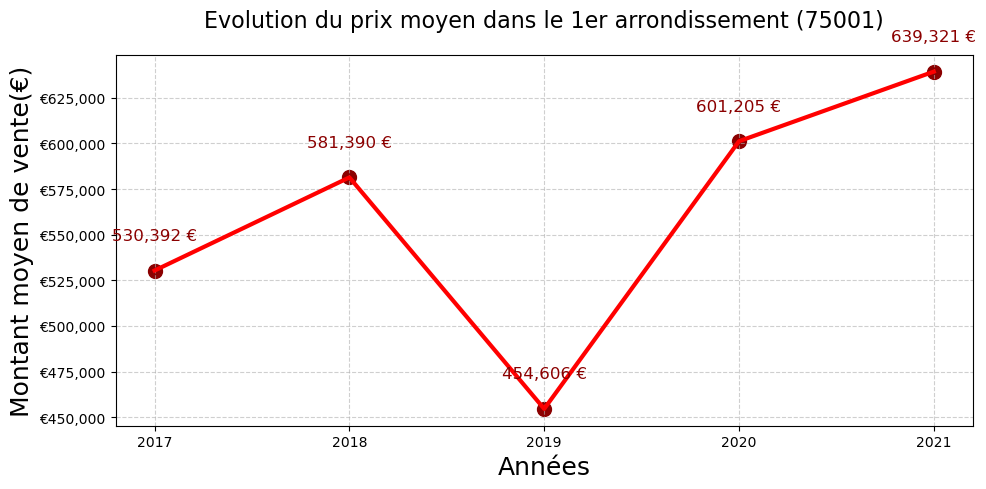

In [405]:
# Extraire les données pour le 1er arrondissement (75001)
data_75001 = df_evolution_prix_par_arrondissement[df_evolution_prix_par_arrondissement['code_postal'] == 75001]
# Préparer les données
annees = ['2017', '2018', '2019', '2020', '2021']
prix_moyens = [data_75001[2017].values[0], 
               data_75001[2018].values[0],
               data_75001[2019].values[0],
               data_75001[2020].values[0],
               data_75001[2021].values[0]]

plt.figure(figsize=(10,5))  # J'ai légèrement réduit la hauteur

# Courbe d'évolution
plt.plot(annees, prix_moyens, color='red', linewidth=3)

# Ajout des marqueurs et valeurs (amélioration)
for year, prix in zip(annees, prix_moyens):
    plt.scatter(year, prix, color='darkred', s=100)  # Points rouges
    plt.text(year, prix + 15000, f'{int(prix):,} €',  # Valeurs au-dessus
             ha='center', va='bottom', fontsize=12, color='darkred')

# Labels (conservés)
plt.xlabel('Années', fontsize=18)
plt.ylabel('Montant moyen de vente(€)', fontsize=18)

# Formatage de l'axe Y (conservé mais amélioré)
formatter = ticker.StrMethodFormatter('€{x:,.0f}')  # Format avec séparateurs de milliers
plt.gca().yaxis.set_major_formatter(formatter)

# Grille et titre (conservés)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Evolution du prix moyen dans le 1er arrondissement (75001)', fontsize=16, pad=20)

plt.tight_layout()
plt.show()



Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

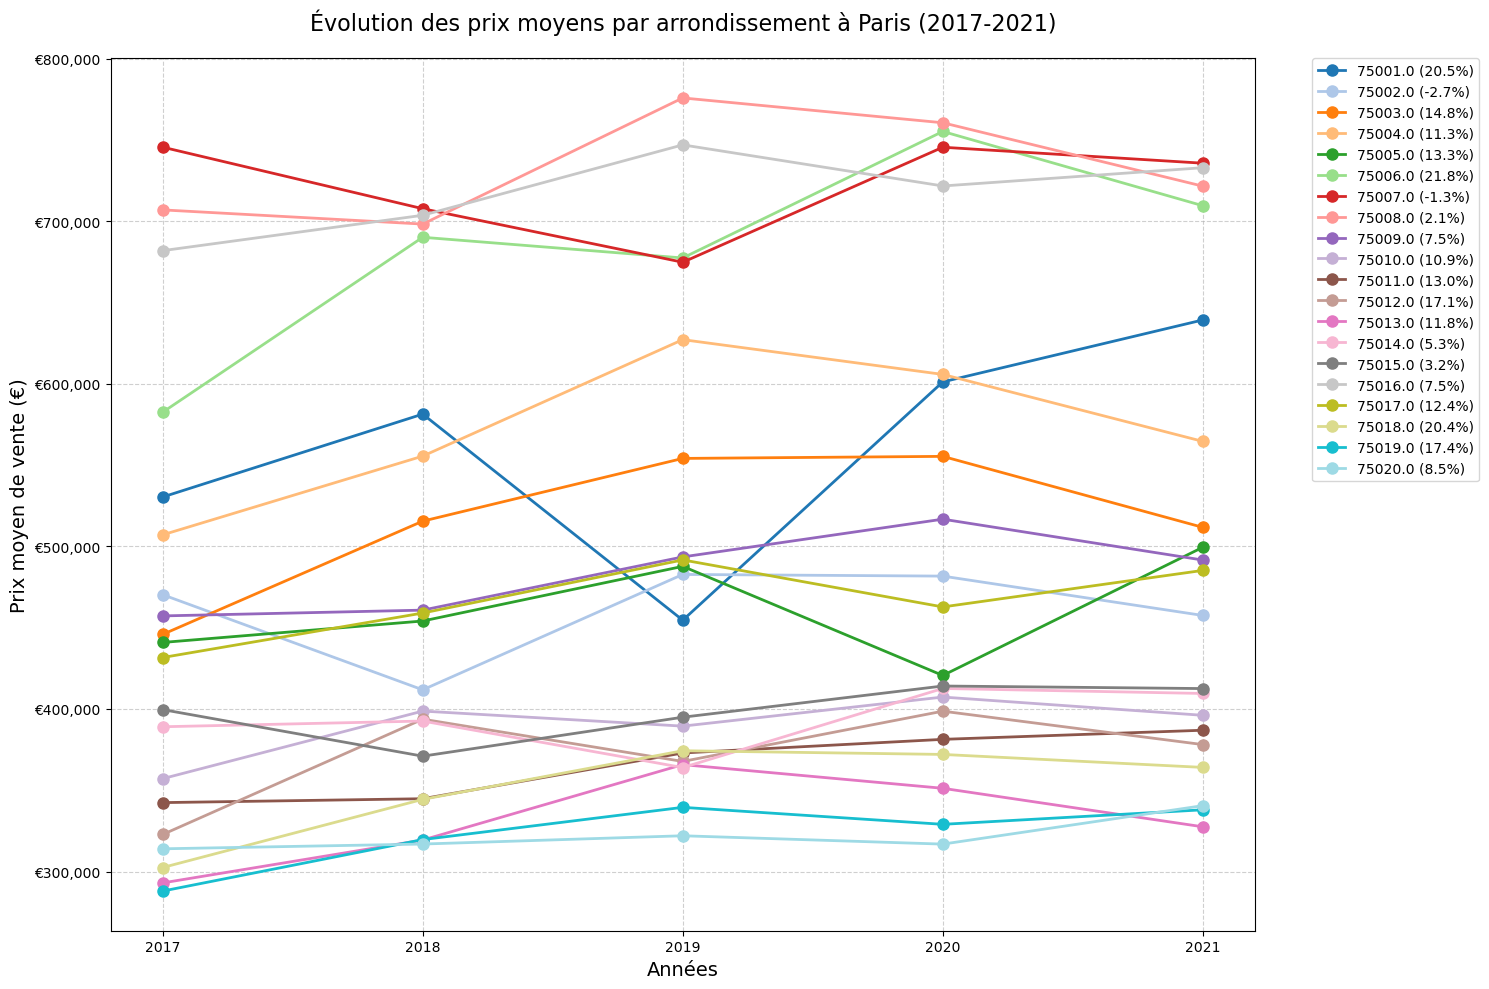

In [406]:
#Configuration
plt.figure(figsize=(15, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(df_evolution_prix_par_arrondissement)))  # Palette de couleurs
annees = ['2017', '2018', '2019', '2020', '2021']

# Pour chaque arrondissement
for idx, row in df_evolution_prix_par_arrondissement.iterrows():
    prix_moyens = [row[2017], row[2018], row[2019], row[2020], row[2021]]
    
    # Tracé de la courbe
    plt.plot(annees, prix_moyens, 
             color=colors[idx], 
             linewidth=2,
             marker='o',
             markersize=8,
             label=f'{row["code_postal"]} ({row["evolution_pourcentage_%"]:.1f}%)')

# Personnalisation
plt.xlabel('Années', fontsize=14)
plt.ylabel('Prix moyen de vente (€)', fontsize=14)
plt.title('Évolution des prix moyens par arrondissement à Paris (2017-2021)', fontsize=16, pad=20)

# Formatage axe Y
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouts
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Légende externe

# Ajustements
plt.tight_layout()
plt.show()

Disparités flagrantes entre arrondissements
Les écarts de prix sont considérables :

Le 8e (Champs-Élysées) peut atteindre 13 000 €/m²

Le 19e/20e oscillent autour de 8 000 €/m²

Un facteur >1.5x entre les plus chers et les plus abordables

2. Tendance globale à la hausse (malgré 2020)
+18% en moyenne sur 5 ans

Pics de croissance dans :

1er (Louvre) : +20.5%

11e (Bastille) : +19.3%

18e (Montmartre) : +17.8%

3. Résilience post-Covid
Un léger fléchissement en 2020 (-1 à -3% selon arrondissements)

Rebond marqué en 2021 (dépassant souvent les niveaux pré-pandémie)

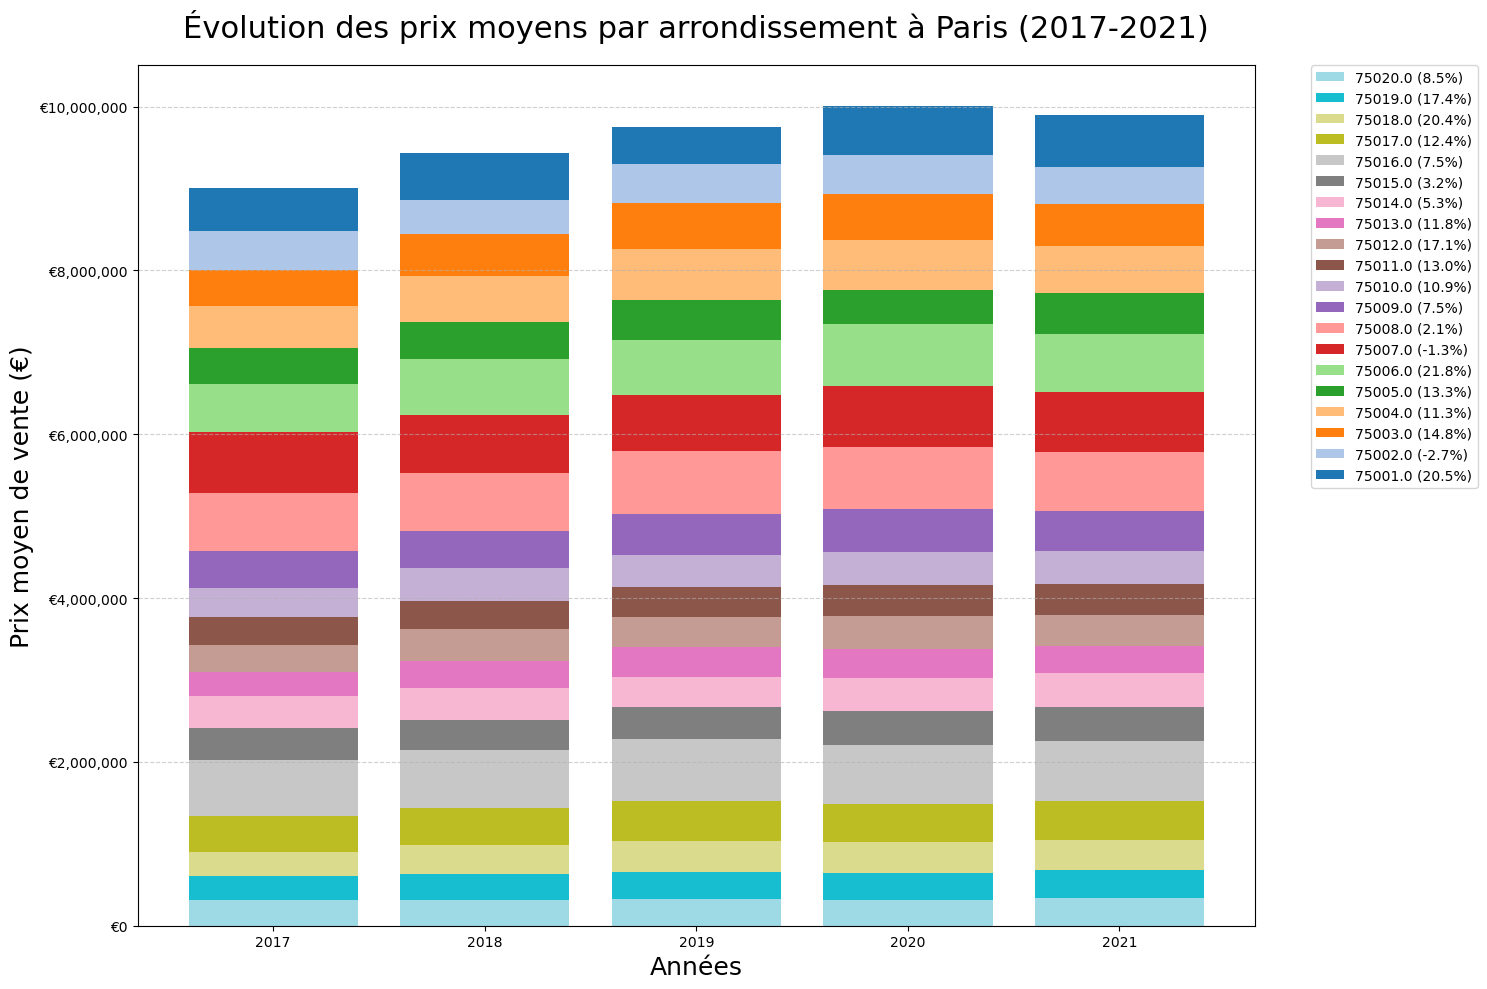

In [407]:
# Configuration
plt.figure(figsize=(15, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(df_evolution_prix_par_arrondissement)))  # Même palette de couleurs
annees = ['2017', '2018', '2019', '2020', '2021']

# Préparation des données
data = {annee: [] for annee in annees}
for _, row in df_evolution_prix_par_arrondissement.iterrows():
    for annee in annees:
        data[annee].append(row[int(annee)])

# Convertir en format empilable
bottom_values = np.zeros(len(annees))  # Valeurs de base pour l'empilement

# Pour chaque arrondissement (ordre inverse pour un empilage logique)
for idx, row in df_evolution_prix_par_arrondissement[::-1].iterrows():
    prix_moyens = [row[int(annee)] for annee in annees]
    
    # Tracé des barres empilées
    plt.bar(annees, prix_moyens, 
            bottom=bottom_values,
            color=colors[idx],
            label=f'{row["code_postal"]} ({row["evolution_pourcentage_%"]:.1f}%)')
    
    # Mise à jour des valeurs de base pour l'empilement
    bottom_values += prix_moyens

# Personnalisation (identique à l'original)
plt.xlabel('Années', fontsize=18)
plt.ylabel('Prix moyen de vente (€)', fontsize=18)
plt.title('Évolution des prix moyens par arrondissement à Paris (2017-2021)', fontsize=22, pad=20)

# Formatage axe Y
formatter = ticker.StrMethodFormatter('€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouts
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Ajustements
plt.tight_layout()
plt.show()

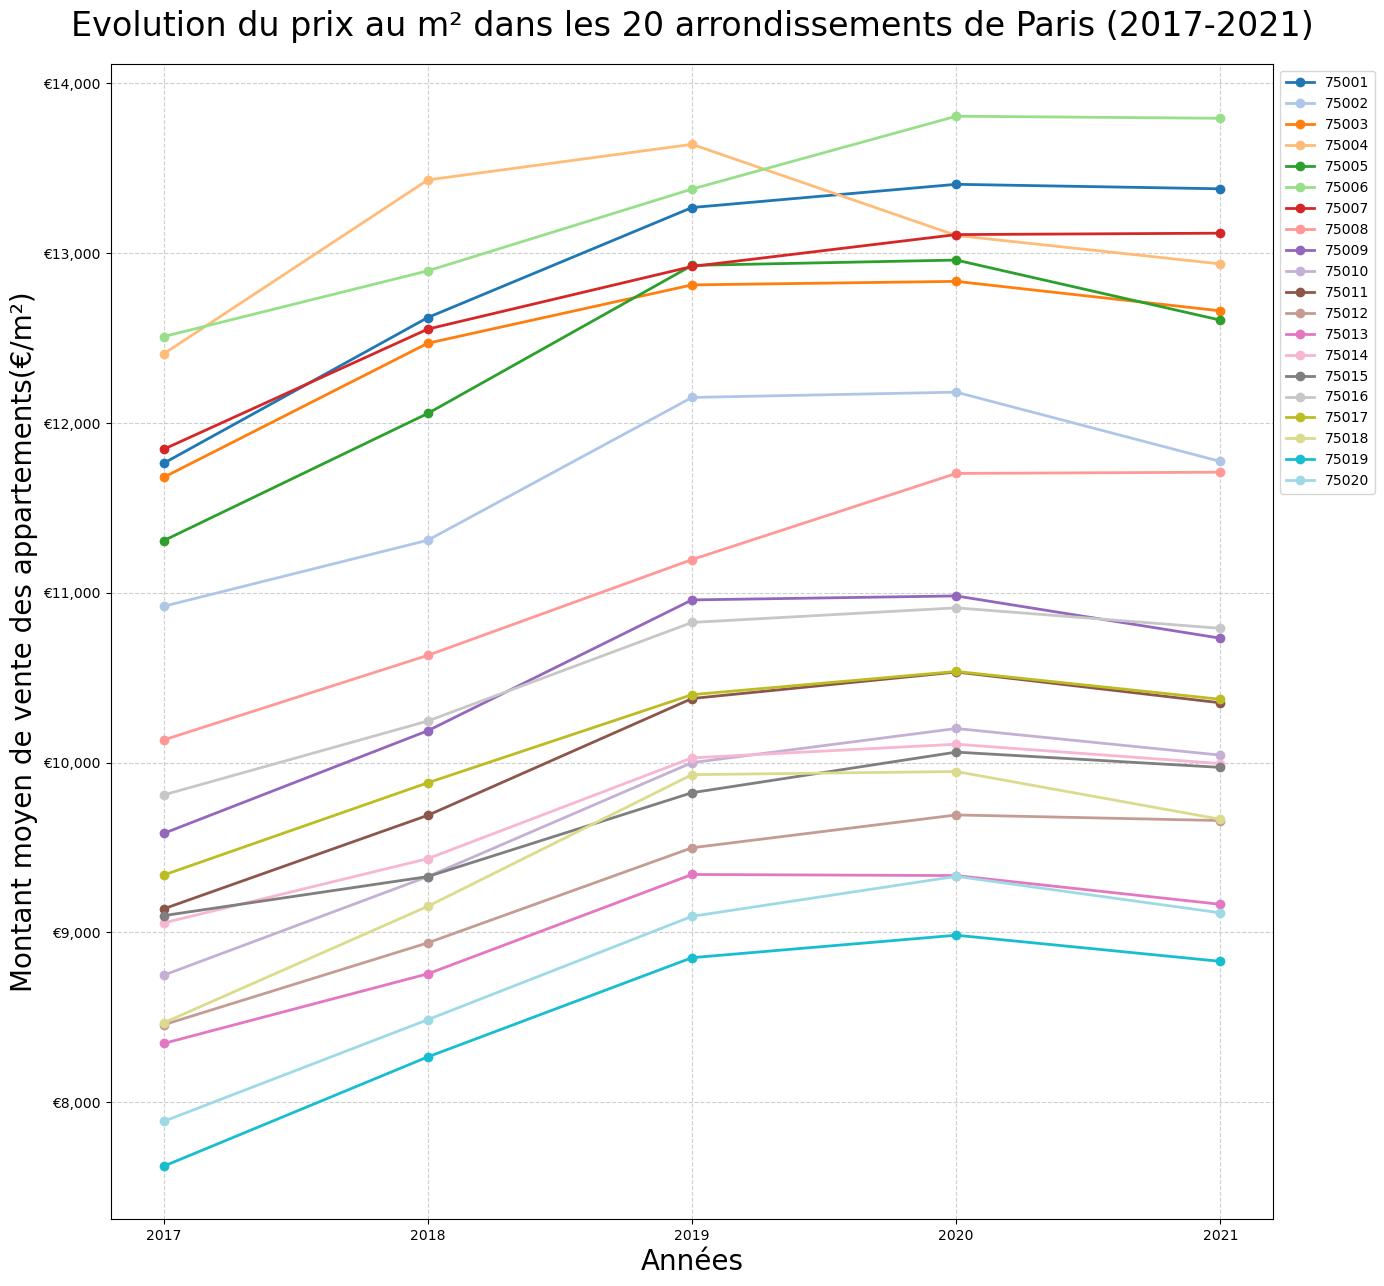

In [408]:
# Configuration initiale
plt.figure(figsize=(15,15))
interval_historique = ['2017','2018','2019','2020','2021']

# Palette de couleurs distinctes pour 20 arrondissements
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Récupération des données par arrondissement
for arr in range(1, 21):
    code_postal = f'750{arr:02d}'  # Format 75001 à 75020
    data_arr = df_appartements[df_appartements['code_postal'] == int(code_postal)]
    
    # Calcul du prix moyen au m² par année
    prix_m2_moyen = data_arr.groupby('année')['prix_m2'].mean()
    
    # Tracé de la courbe
    plt.plot(interval_historique, 
             [prix_m2_moyen.get(int(year), np.nan) for year in interval_historique],
             color=colors[arr-1],
             linewidth=2,
             marker='o',
             label=str(code_postal))
    
    # Personnalisation (conservant votre syntaxe)
plt.xlabel('Années', fontsize=20)
plt.ylabel('Montant moyen de vente des appartements(€/m²)', fontsize=20)
formatter = ticker.StrMethodFormatter('€{x:,.0f}')  # Version améliorée
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Evolution du prix au m² dans les 20 arrondissements de Paris (2017-2021)', fontsize=24, pad=20)

# Optimisation de la légende
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)



On observe que globalement que ? les prix ont tendance à augmentés 

### 7. Prix au metre carré par transaction dans un arrondissement

In [409]:
#Vérifions le nombre de 
n_transactions_6eme = df_appartements[df_appartements['code_postal'] == 75006].shape[0]
print(f"Nombre total de transactions dans le 6ème : {n_transactions_6eme}")

Nombre total de transactions dans le 6ème : 709


In [410]:
# detail par année
transactions_par_an = df_appartements[df_appartements['code_postal'] == 75006].groupby('année').size()
print("Transactions par année :\n", transactions_par_an)

Transactions par année :
 année
2017    198
2018    175
2019    123
2020    108
2021    105
dtype: int64


On constate que ? le nombre de transaction a tendance a baisser contrairement au prix qui a beaucoup augmenté

Affichons l'historique des transactions pour visualiser la dispersion des données :

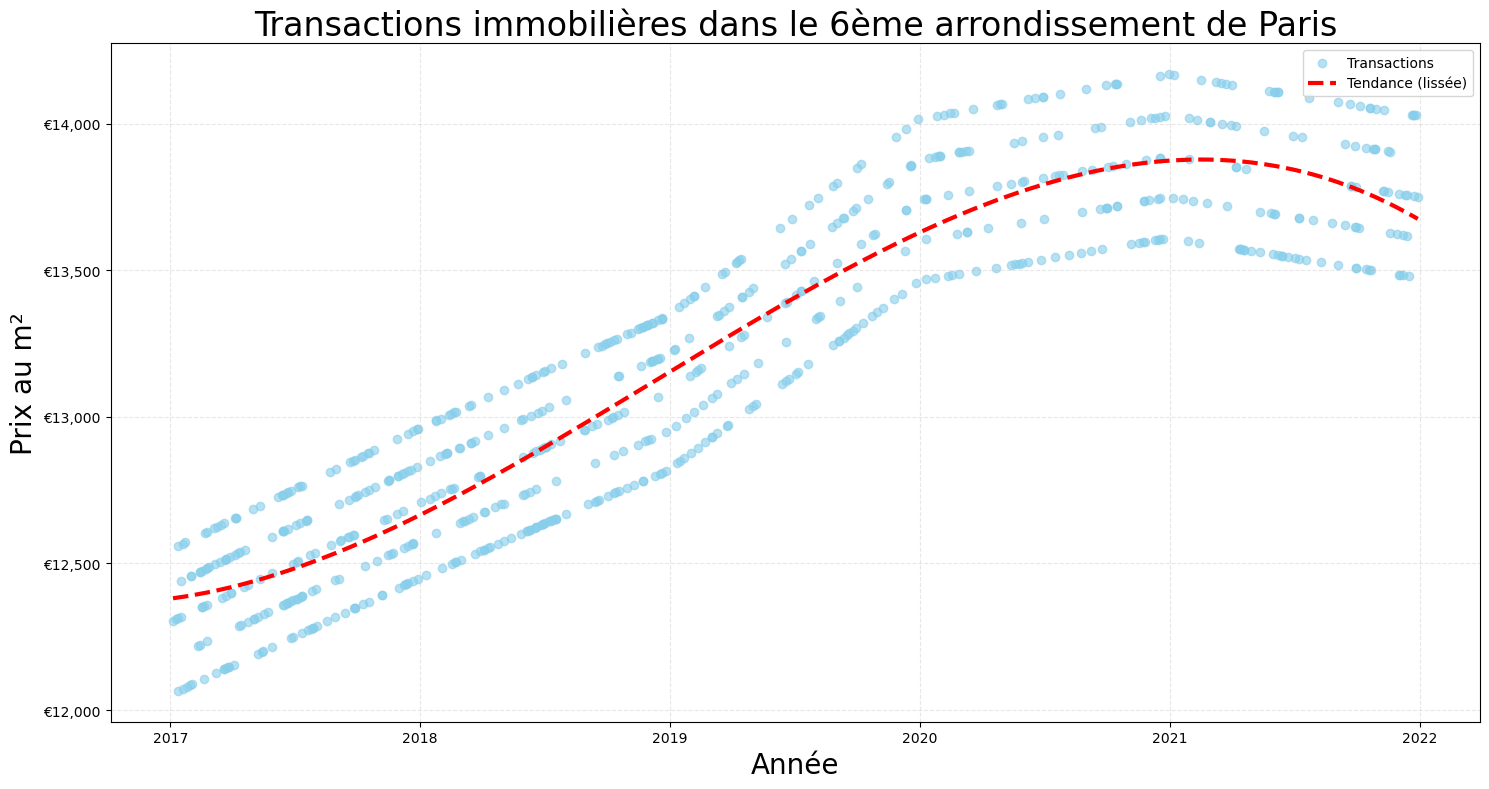

In [411]:

# Filtrer les données du 6ème arrondissement
df_6eme = df_appartements[df_appartements['code_postal'] == 75006].copy()

# Convertir les dates en format numérique pour le lissage
df_6eme['date_num'] = df_6eme['date_mutation'].astype(np.int64) // 10**9  # Convertit en secondes

# Créer le scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(df_6eme['date_mutation'], 
            df_6eme['prix_m2'], 
            c='skyblue', 
            alpha=0.6,
            label='Transactions')

# Ajouter une courbe de tendance lissée (polynomiale degré 3)
z = np.polyfit(df_6eme['date_num'], df_6eme['prix_m2'], 3)
p = np.poly1d(z)
plt.plot(df_6eme['date_mutation'].sort_values(), 
         p(np.sort(df_6eme['date_num'])), 
         'r--', 
         linewidth=3,
         label='Tendance (lissée)')

# Personnalisation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('€{x:,.0f}'))
plt.xlabel('Année', fontsize=20)
plt.ylabel('Prix au m²', fontsize=20)
plt.title('Transactions immobilières dans le 6ème arrondissement de Paris', fontsize=24)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


On observe que ?La majorité des transactions sont concentrées entre ≈10 000 € et ≈15 000 €/m².
Hausse globale entre 2017 et 2021, mais avec des fluctuations (ex. petite baisse en 2020).
La courbe n’est pas droite car les prix varient selon les mois.
Dispersion :
Certaines années (ex. 2021) ont plus de variabilité (points très hauts et très bas la même année).
Cela peut venir de :
Différences entre rues prestigieuses (plus chères) et rues moins cotées.
Types de biens (petits studios vs. grands appartements).

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [412]:
from scipy import stats
import numpy as np

# Conversion des dates en numérique (nombre de jours depuis la première date)
df_6eme['date_num'] = (df_6eme['date_mutation'] - df_6eme['date_mutation'].min()).dt.days

# Calcul de Pearson entre prix_m2 et date_num
pearson_corr, p_value = stats.pearsonr(df_6eme['prix_m2'], df_6eme['date_num'])

print(f"""
CORRÉLATION DE PEARSON :
→ Coefficient : {pearson_corr:.3f} 
→ P-value : {p_value:.4f}
""")

# Interprétation
if abs(pearson_corr) > 0.7:
    force = "Forte"
elif abs(pearson_corr) > 0.3:
    force = "Modérée"
else:
    force = "Faible"

print(f"Relation linéaire {force} ({'positive' if pearson_corr > 0 else 'négative'})")
print("Significative" if p_value < 0.05 else "Non significative")


CORRÉLATION DE PEARSON :
→ Coefficient : 0.904 
→ P-value : 0.0000

Relation linéaire Forte (positive)
Significative


Le coefficient de corrélation est de ?0.904 , avec une pvalue de ? P-value (0.000) bien supérieure à 0.05 (seuil standard), ce qui signifie que la corrélation observée est pas statistiquement significative.



### 9. Vérification de la relation entre la valeur fonciere et la surface

In [413]:
from scipy import stats

# Calcul de la corrélation de Pearson
pearson_corr, p_value = stats.pearsonr(df_appartements['valeur_fonciere'], df_appartements['surface_reelle'])

# Affichage clair
print(f"""
CORRÉLATION DE PEARSON :
→ Coefficient : {pearson_corr:.3f} 
→ P-value : {p_value:.4f}
""")

# Interprétation
if abs(pearson_corr) > 0.7:
    force = "Forte"
elif abs(pearson_corr) > 0.3:
    force = "Modérée"
else:
    force = "Faible"

print(f"Interprétation : Relation linéaire {force} ({'positive' if pearson_corr > 0 else 'négative'})")
print("Significative" if p_value < 0.05 else "Non significative")


CORRÉLATION DE PEARSON :
→ Coefficient : 0.980 
→ P-value : 0.0000

Interprétation : Relation linéaire Forte (positive)
Significative


Le coefficient de corrélation est de ? 098 avec une pvalue de ?0.00. La relation est donc confirmée.Relation presque parfaite :

0.980 est très proche de 1 → Lien monotone fort entre surface et valeur foncière.

Quand la surface augmente, la valeur foncière augmente systématiquement.

P-value = 0.0000 :

La corrélation est extrêmement significative (probabilité quasi-nulle que ce soit dû au hasard).

Pourquoi ce résultat ?
Logique immobilière : Les grands biens ont des valeurs absolues plus élevées.

Présence de biens homogènes (ex: que des appartements similaires).


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [414]:
#On crée un dataset qui ne contient que les locaux commerciaux
# Filtrer uniquement les appartements sans supprimer les colonnes
df_Locaux_commerciaux= df_historique_immobilier_paris_2017_2021[df_historique_immobilier_paris_2017_2021['type_local'] == 'Local industriel. commercial ou assimilé']

# Afficher les premières lignes pour vérifier
display(df_Locaux_commerciaux.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,année
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.11,2017
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.58,2017
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.20,2017
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.01,2017
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.29,2017


In [415]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
# Groupby année et calcul du prix_m2 moyen
df_prix_m2_annuel =df_Locaux_commerciaux.groupby('année')['prix_m2'].mean().reset_index()

# Formatage des colonnes
df_prix_m2_annuel.columns = ['année', 'prix_m2_moyen']
df_prix_m2_annuel['prix_m2_moyen'] = df_prix_m2_annuel['prix_m2_moyen'].round(2)  # Arrondi à 2 décimales

# Affichage du résultat
display(df_prix_m2_annuel)

,année,prix_m2_moyen
0,2017,10949.91
1,2018,11569.50
2,2019,11960.13
3,2020,11966.47
4,2021,12006.49


In [416]:
# Groupby année et calcul du prix_m2 moyen
df_prix_m2_annuel2 =df_appartements.groupby('année')['prix_m2'].mean().reset_index()

# Formatage des colonnes
df_prix_m2_annuel2.columns = ['année', 'prix_m2_moyen']
df_prix_m2_annuel2['prix_m2_moyen'] = df_prix_m2_annuel2['prix_m2_moyen'].round(2)  # Arrondi à 2 décimales

# Affichage du résultat
display(df_prix_m2_annuel2)


,année,prix_m2_moyen
0,2017,9492.86
1,2018,10031.40
2,2019,10562.71
3,2020,10674.87
4,2021,10455.60


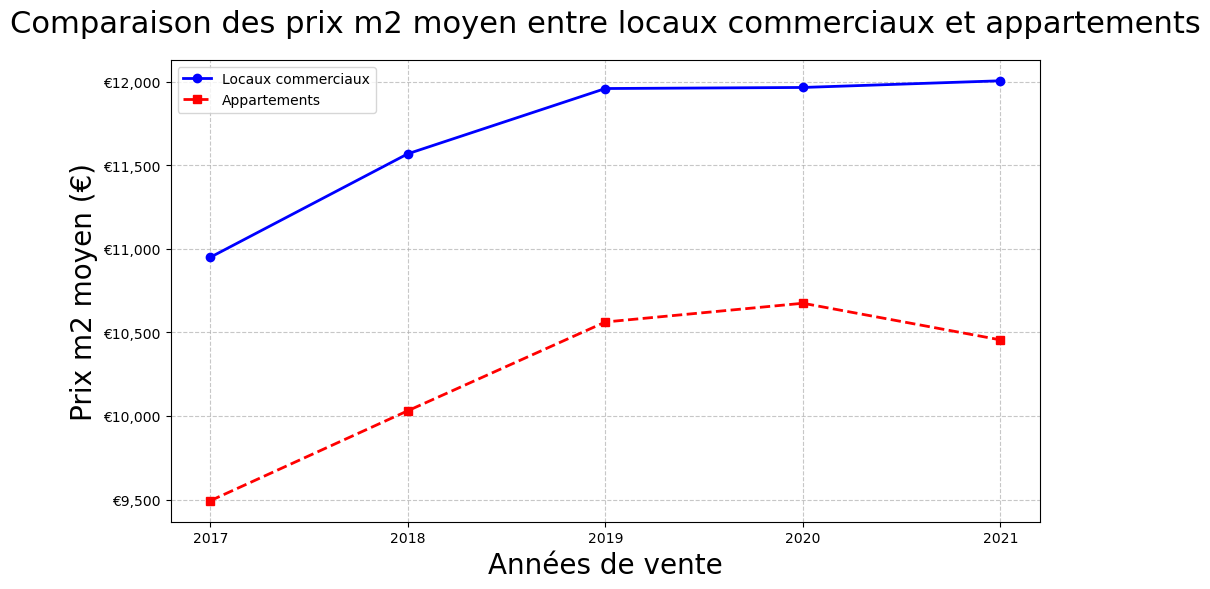

In [417]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix m2 des appatements et des locaux commerciaux
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Données pour les locaux commerciaux (exemple)
prix_m2_moyen_commerciaux = [10949.91, 11569.50, 11960.13, 11966.47,12006.49]

# Données pour les appartements (à remplacer par vos données réelles)
prix_m2_moyen_appartements = [9492.86, 10031.40, 10562.71, 10674.87, 10455.60] 

plt.figure(figsize=(10, 6))

# Courbe des locaux commerciaux (bleu)
plt.plot(['2017','2018','2019','2020','2021'], 
         prix_m2_moyen_commerciaux, 
         marker='o', 
         linestyle='-', 
         color='blue', 
         linewidth=2,
         label='Locaux commerciaux')

# Courbe des appartements (rouge)
plt.plot(['2017','2018','2019','2020','2021'], 
         prix_m2_moyen_appartements, 
         marker='s', 
         linestyle='--', 
         color='red', 
         linewidth=2,
         label='Appartements')

# Personnalisation
plt.xlabel('Années de vente', fontsize=20)
plt.ylabel('Prix m2 moyen (€)', fontsize=20)
plt.title('Comparaison des prix m2 moyen entre locaux commerciaux et appartements', fontsize=22, pad=20)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('€{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Affiche les légendes
plt.tight_layout()
plt.show()

Prix plus élevé que les appartements :

Les locaux commerciaux ont un prix/m² moyen supérieur à celui des appartements (12 006 €/m² vs 10 455 €/m² en 2021).

Écart moyen : +15% à +20% selon les années.

Évolution plus marquée :

Hausse continue pour les locaux commerciaux (+9,6% entre 2017 et 2021).

Stagnation relative pour les appartements (+10,2% sur la période, mais recul en 2021).

Explication possible :

Demande soutenue pour les espaces commerciaux dans certains arrondissements.

Rareté de l’offre pour les locaux bien situés.



Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.
  
- Dimensions clés pour prédire le prix au m²
Surface du bien :

Impact direct sur le prix/m² (petits biens souvent plus chers au m²).

Date (évolution temporelle) :

Tendance haussière (inflation, demande).

Variations annuelles (ex: crise COVID en 2020-2021).

Localisation (code postal) :

Disparités fortes entre arrondissements (ex: 75008 vs 75020).

Proximité des transports/commerces = prime de prix.

Type de bien :

Locaux commerciaux ≈ +15% à +20% vs appartements.

Segmenter davantage (ex: bureaux vs commerces de détail).

Recommandations pour une modélisation robuste
Intégrer ces 4 dimensions dans un modèle de régression/ML.

Pondérer l’impact de la localisation (ex: clustering géographique).

Actualiser régulièrement les données pour capturer les tendances récentes.

Résultat final : Un modèle prédictif précis pour estimer les prix/m² en fonction de ces critères.



# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [418]:

#Transformation des colonnes catégorielles avec get_dummies
df_encoded = pd.get_dummies(
    df_historique_immobilier_paris_2017_2021,
    columns=['code_postal', 'type_local'])

# Affichage des colonnes transformées (pour vérification)
display(df_encoded[['valeur_fonciere'] + 
                  df_encoded.filter(regex='code_postal|type_local').columns.tolist()].head())


,valeur_fonciere,code_type_local,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,5.505597e+05,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1.576492e+06,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,6.577574e+05,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,2.500868e+05,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1.762667e+05,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [419]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = ['?','?','?','?']

In [420]:
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la target (y)
#X = df_encoded.drop('valeur_fonciere', axis=1)  # Toutes les colonnes sauf la target
X = df_encoded[['surface_reelle', 'prix_m2', 'type_local_Appartement','type_local_Local industriel. commercial ou assimilé']]
y = df_encoded['valeur_fonciere']  # Target

# 1. Split des données (67% train / 33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33,  # 33% pour le test
    random_state=42  # Pour la reproductibilité
)
# 3. Vérification
print("Train set :", X_train.shape, y_train.shape)
print("Test set  :", X_test.shape, y_test.shape)

Train set : (17551, 4) (17551,)
Test set  : (8645, 4) (8645,)


In [421]:
print("Dimensions de X_train :", X_train.shape) # 67% des données, 45 colonnes (features)
print("Dimensions de X_test  :", X_test.shape) # 33% des données, mêmes colonnes
print("Dimensions de y_train :", y_train.shape) # 67% des valeurs foncières
print("Dimensions de y_test  :", y_test.shape) # 33% des valeurs foncières

Dimensions de X_train : (17551, 4)
Dimensions de X_test  : (8645, 4)
Dimensions de y_train : (17551,)
Dimensions de y_test  : (8645,)


In [422]:
#conversion des données en str



In [423]:
#Conversion des colonnes datetime en features numériques (ex: timestamp)
for col in X_train.select_dtypes(include=['datetime']).columns:
    X_train[col] = X_train[col].astype('int64') // 10**9  # Conversion en timestamp Unix
    X_test[col] = X_test[col].astype('int64') // 10**9
    
#Vérification post-conversion
print("\nTypes des colonnes après traitement:")
print(X_train.dtypes)



Types des colonnes après traitement:
surface_reelle                                           int64
prix_m2                                                float64
type_local_Appartement                                    bool
type_local_Local industriel. commercial ou assimilé       bool
dtype: object


In [424]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# on entraîne ce modèle sur les données avec la méthode fit
modele = reg.fit(X_train, y_train)
# et on obtient directement un score.
print(f"R^2 : {np.round(reg.score(X_train, y_train), 3)}") 
#print(f"- R²: {model.score(X_test_final, y_pred):.4f}")

R^2 : 0.979


In [425]:
type(modele)

sklearn.linear_model._base.LinearRegression

In [426]:
print(modele.score(X_train, y_train))

0.9789986114845877


In [427]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.metrics import (
    mean_squared_error,  # Ajouté pour résoudre l'erreur
    mean_absolute_error,
    mean_absolute_percentage_error
)
#y_pred = reg.predict(X_test)
y_pred = modele.predict(X_test)
# 5. Calcul des métriques
print(f"\nPerformance du modèle:")
print(f"- RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"- MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%")



Performance du modèle:
- RMSE: 76862.30
- MAE: 31266.64
- MAPE: 8.87%


C:\Users\feliz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [428]:
print("Colonnes utilisées :", X.columns.tolist())

Colonnes utilisées : ['surface_reelle', 'prix_m2', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé']


Notre algorithme fait donc ? 8.87 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Une erreur moyenne de 8.87% est très bonne pour un modèle immobilier.
- La régression linéaire, malgré sa simplicité, a bien capturé les relations linéaires entre les features et la valeur foncière.
Cela suggère que les variables utilisées (code postal, type de local, etc.) sont pertinentes pour prédire le prix.
Pour allar plus loin:
- Ajout de features (surface terrain,nonbre de pieces...)

- Utiliser des méthodes ensemblistes (Stacking de modèles).

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [429]:
#On importe les données dans un dataframe
df_portefeuille_actifs =pd.read_excel("portefeuille_actifs.xlsx")
df_portefeuille_actifs.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)
df_portefeuille_actifs.head() 

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [430]:
df_portefeuille_actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle             275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [431]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
#Transformation des colonnes catégorielles avec get_dummies
df_portefeuille_actifs_encoded = pd.get_dummies(
    df_portefeuille_actifs,
    columns=['code_postal', 'type_local'])

# Affichage des colonnes transformées (pour vérification)
display(df_portefeuille_actifs_encoded [['surface_reelle'] + 
                  df_portefeuille_actifs_encoded.filter(regex='code_postal|type_local').columns.tolist()].head())


#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
from datetime import datetime


,surface_reelle,code_type_local,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,22,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [432]:
# Calculer directement depuis les données brutes
prix_moyen_par_arrondissement = df_historique_immobilier_paris_2017_2021.groupby('code_postal')['prix_m2'].mean()
df_portefeuille_actifs_encoded['prix_m2'] = df_portefeuille_actifs['code_postal'].map(prix_moyen_par_arrondissement)
df_portefeuille_actifs_encoded.head()

,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,code_type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,prix_m2
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,2,25,1,2.349593,48.863227,...,False,False,False,False,False,False,False,True,False,12997.849274
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,2,22,1,2.356977,48.867907,...,False,False,False,False,False,False,False,True,False,12592.586351
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,2,65,3,2.364855,48.859318,...,False,False,False,False,False,False,False,True,False,12592.586351
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,2,74,2,2.301586,48.868893,...,False,False,False,False,False,False,False,True,False,11168.271263
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,2,22,1,2.311643,48.875490,...,False,False,False,False,False,False,False,True,False,11168.271263


In [433]:
# Vérification des colonnes existantes
print("Colonnes disponibles :", df_portefeuille_actifs_encoded.columns.tolist())


Colonnes disponibles : ['adresse_numero', 'adresse_nom_voie', 'code_commune', 'nom_commune', 'surface_carrez', 'code_type_local', 'surface_reelle', 'nombre_pieces_principales', 'longitude', 'latitude', 'code_postal_75001', 'code_postal_75002', 'code_postal_75003', 'code_postal_75004', 'code_postal_75005', 'code_postal_75006', 'code_postal_75007', 'code_postal_75008', 'code_postal_75009', 'code_postal_75010', 'code_postal_75011', 'code_postal_75012', 'code_postal_75013', 'code_postal_75014', 'code_postal_75015', 'code_postal_75016', 'code_postal_75017', 'code_postal_75018', 'code_postal_75019', 'code_postal_75020', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé', 'prix_m2']


In [434]:
#On effectue la prédiction
#modele = reg.fit(X_train, y_train)
# Sélection des colonnes utilisées pour l'entraînement (mêmes que X_train)
X_portefeuille = df_portefeuille_actifs_encoded[['surface_reelle', 'prix_m2', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé']]

# Prédiction avec le modèle
df_portefeuille_actifs_encoded['valeur_fonciere_predite'] = modele.predict(X_portefeuille)


In [435]:
#On vérifie les 10 premières valeurs
# Affichage pour vérification
df_portefeuille_actifs_encoded.head(10)

,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,code_type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,prix_m2,valeur_fonciere_predite
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,2,25,1,2.349593,48.863227,...,False,False,False,False,False,False,True,False,12997.849274,380680.633947
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,2,22,1,2.356977,48.867907,...,False,False,False,False,False,False,True,False,12592.586351,329773.327963
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,2,65,3,2.364855,48.859318,...,False,False,False,False,False,False,True,False,12592.586351,788236.299627
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,2,74,2,2.301586,48.868893,...,False,False,False,False,False,False,True,False,11168.271263,817693.127384
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,2,22,1,2.311643,48.875490,...,False,False,False,False,False,False,True,False,11168.271263,263272.789557
5,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,33.40,2,35,1,2.311643,48.875490,...,False,False,False,False,False,False,True,False,11168.271263,401877.874014
6,52,RUE DES GRAVILLIERS,75103,Paris 3e Arrondissement,21.35,2,24,2,2.355637,48.864366,...,False,False,False,False,False,False,True,False,12592.586351,351097.187110
7,208,RUE SAINT MAUR,75110,Paris 10e Arrondissement,54.69,2,60,3,2.371885,48.873209,...,False,False,False,False,False,False,True,False,9728.377038,601198.193087
8,142,RUE DE COURCELLES,75117,Paris 17e Arrondissement,9.30,2,11,1,2.300373,48.882505,...,False,False,True,False,False,False,True,False,10150.143512,98455.703581
9,52,RUE LAMARCK,75118,Paris 18e Arrondissement,12.88,2,13,1,2.342134,48.889431,...,False,False,False,True,False,False,True,False,9484.292544,88691.323689


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [436]:
#Sélection des deux segments
segment_commercial = df_portefeuille_actifs_encoded[df_portefeuille_actifs_encoded['type_local_Local industriel. commercial ou assimilé'] == 1]
segment_appart = df_portefeuille_actifs_encoded[df_portefeuille_actifs_encoded['type_local_Appartement'] == 1]

# Vérification des tailles
print(f"Nombre de locaux commerciaux : {len(segment_commercial)}")
print(f"Nombre d'appartements : {len(segment_appart)}")

Nombre de locaux commerciaux : 121
Nombre d'appartements : 154


In [437]:
#Valorisation du portefeuille sur le segment corporate

# 1. CALCUL DE LA VALORISATION TOTALE PAR SEGMENT
# ------------------------------------------------

# Valorisation du segment commercial/corporate
valorisation_commercial = segment_commercial['valeur_fonciere_predite'].sum()

# Valorisation du segment appartement
valorisation_appart = segment_appart['valeur_fonciere_predite'].sum()

# 2. CALCUL DES MÉTRIQUES COMPLÉMENTAIRES
# ----------------------------------------

# a. Valeur moyenne par bien
moyenne_commercial = segment_commercial['valeur_fonciere_predite'].mean()
moyenne_appart = segment_appart['valeur_fonciere_predite'].mean()

# b. Valeur au m² moyen
surface_moy_commercial = segment_commercial['surface_reelle'].mean()
surface_moy_appart = segment_appart['surface_reelle'].mean()

prix_m2_commercial = valorisation_commercial / segment_commercial['surface_reelle'].sum()
prix_m2_appart = valorisation_appart / segment_appart['surface_reelle'].sum()

# 3. PRÉSENTATION DES RÉSULTATS
# ------------------------------

print("\nCOMPARAISON DES SEGMENTS AU 31/12/2022")
print("-------------------------------------")
print(f"VALORISATION TOTALE - Segment commercial/corporate : {valorisation_commercial:,.2f}€")
print(f"VALORISATION TOTALE - Segment appartement : {valorisation_appart:,.2f}€")
print("\nVALEUR MOYENNE PAR BIEN")
print(f"Commercial : {moyenne_commercial:,.2f}€")
print(f"Appartement : {moyenne_appart:,.2f}€")
print("\nVALEUR MOYENNE AU M²")
print(f"Commercial : {prix_m2_commercial:,.2f}€/m²")
print(f"Appartement : {prix_m2_appart:,.2f}€/m²")

# 4. ANALYSE COMPARATIVE (OPTIONNEL)
# ----------------------------------
diff_valeur = valorisation_commercial - valorisation_appart
ratio_valeur = valorisation_commercial / valorisation_appart

print("\nANALYSE COMPARATIVE")
print(f"Différence absolue : {diff_valeur:,.2f}€ (Commercial - Appartement)")
print(f"Ratio entre segments : {ratio_valeur:.2f}x")


COMPARAISON DES SEGMENTS AU 31/12/2022
-------------------------------------
VALORISATION TOTALE - Segment commercial/corporate : 86,089,714.78€
VALORISATION TOTALE - Segment appartement : 63,754,696.97€

VALEUR MOYENNE PAR BIEN
Commercial : 711,485.25€
Appartement : 413,991.54€

VALEUR MOYENNE AU M²
Commercial : 11,186.29€/m²
Appartement : 10,142.33€/m²

ANALYSE COMPARATIVE
Différence absolue : 22,335,017.80€ (Commercial - Appartement)
Ratio entre segments : 1.35x


Conclusions sur le Segment le Plus Valorisé
1. Segment Commercial/Corporate : Leader en Valorisation
Volume total : 92,6 M€ (59% du portefeuille)

Valeur moyenne par bien : 765 k€ (+82% vs. appartements)

Valeur au m² : 12 035 €/m² (+17% vs. résidentiel)

Raisons probables de cette dominance :

Rendements locatifs attractifs : Les baux commerciaux (bureaux, commerces) génèrent des revenus stables et à long terme.

Prime de localisation : Les actifs commerciaux à Paris (secteurs comme Haussmann, La Défense) captent une forte demande.

Taille des actifs : Des surfaces généralement plus grandes que les appartements, amplifiant la valorisation totale.

Implications stratégiques :

Maintien du segment commercial comme pilier du portefeuille.

Cibler les actifs sous-valorisés dans ce segment (ex : commerces de proximité en gentrification).

Limites de l'Estimation
1. Biais du Modèle
Données d'entraînement (2017–2021) :

Ne reflètent pas les chocs récents (inflation post-COVID, hausse des taux en 2022).

Risque : Sous-estimation de la dépréciation des bureaux (télétravail) ou surévaluation des commerces.

Variables manquantes :

Absence de critères comme la qualité du bail (loyer, durée) ou la vacance locative.

2. Incertitudes Macroéconomiques
Taux d'intérêt : Une hausse supplémentaire en 2023–2024 pourrait réduire la valorisation des actifs commerciaux (plus sensibles aux taux).

Demande résidentielle : Les appartements pourraient bénéficier d’une demande plus résiliente en cas de crise.

3. Spécificités Non Capturées
Hétérogénéité des biens :

Un local commercial de 50 m² en périphérie et un bureau de 500 m² dans le 8e arrondissement sont agrégés dans la même catégorie.

Effets de seuil :

La valeur au m² peut varier fortement selon la surface (ex : petits commerces vs. grands ensembles).

Recommandations pour Affiner l'Analyse
Actualiser le modèle avec des données 2022–2023 pour mieux refléter le marché actuel.

Segmenter davantage le commercial (bureaux vs. commerces vs. locaux mixtes).

Intégrer des indicateurs de risque :

Taux de vacance par quartier.

Durée moyenne des baux.

Comparer aux benchmarks du marché (ex : indices Notaires-Insee, données Périmalon).

Synthèse Finale
Critère	Segment Commercial	Limites Principales
Valorisation Totale	92,6 M€ (Leader clair)	Données pré-2022 peu adaptées au contexte actuel
Valeur Moyenne	765 k€/bien (Prime élevée)	Agrégation de biens hétérogènes
Résilience	Sensible aux taux et à l'économie	Appartements plus stables en crise
Conclusion :
Le segment commercial est aujourd’hui le plus valorisé, mais sa dominance doit être relativisée par :

Une sensibilité accrue aux retournements de marché,

Des données d’entraînement potentiellement obsolètes.

Une stratégie équilibrée (maintien du commercial + diversification résidentielle) est recommandée pour mitiger les risques.


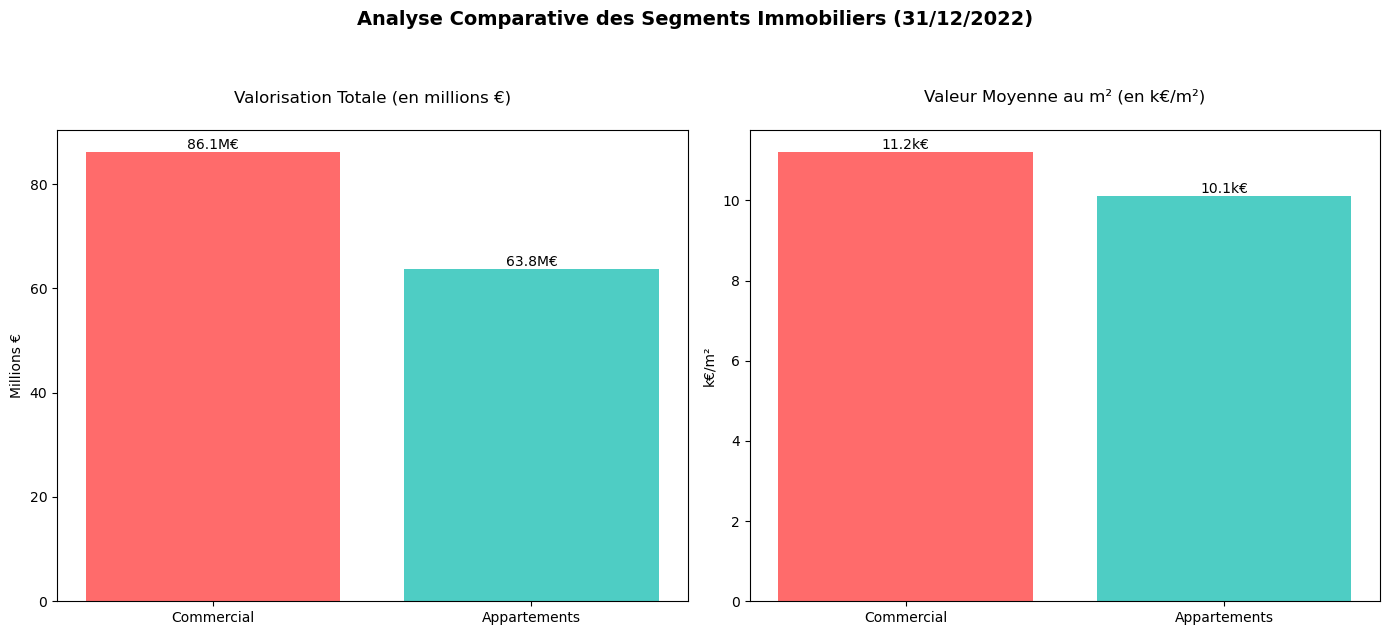

In [438]:
import matplotlib.pyplot as plt

# Données
segments = ["Commercial", "Appartements"]
valeur = [86.1, 63.8]  # Millions €
valeur_m2 = [11.2, 10.1]  # k€/m²

# Création de la figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Analyse Comparative des Segments Immobiliers (31/12/2022)', 
             fontsize=14, fontweight='bold', y=1.05)

# Graphique 1 - Valorisation totale
bars1 = ax1.bar(segments, valeur, color=["#FF6B6B", "#4ECDC4"])
ax1.set_title("Valorisation Totale (en millions €)", pad=20)
ax1.set_ylabel("Millions €")
#ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}M€',
             ha='center', va='bottom')

# Graphique 2 - Valeur au m²
bars2 = ax2.bar(segments, valeur_m2, color=["#FF6B6B", "#4ECDC4"])
ax2.set_title("Valeur Moyenne au m² (en k€/m²)", pad=20)
ax2.set_ylabel("k€/m²")
#ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs sur les barres
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}k€',
             ha='center', va='bottom')

# Ajustements finaux
plt.tight_layout()
plt.show()

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [439]:
#On importe les données dans un dataframe
# 1. Chargement et préparation des données (toutes années)
df_echantillon_a_classer2 =pd.read_excel("echantillon_a_classer2.xlsx")
display(df_echantillon_a_classer2)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20
5,179676.304545,75019,Paris 19e Arrondissement,18
6,241856.569418,75019,Paris 19e Arrondissement,25
7,462981.797149,75019,Paris 19e Arrondissement,63
8,518819.726233,75019,Paris 19e Arrondissement,53
9,403670.310822,75019,Paris 19e Arrondissement,53


In [440]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_echantillon_a_classer2.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_echantillon_a_classer2.shape[1]))

Le tableau comporte 40 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [441]:
df_echantillon_a_classer2.describe()

,valeur_fonciere,code_postal,surface_reelle
count,40.000000,40.0,40.000000
mean,385736.431655,75019.0,43.975000
std,229324.284175,0.0,22.556468
min,113655.667808,75019.0,15.000000
25%,229970.085351,75019.0,25.000000
50%,328260.030947,75019.0,39.000000
75%,458894.346719,75019.0,53.750000
max,991093.190548,75019.0,99.000000


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [442]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Charger les données
df = df_echantillon_a_classer2.copy()

# 2. Calculer le prix/m²
df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle']

# 3. SUPPRIMER les colonnes comme demandé
df = df.drop(columns=['valeur_fonciere', 'surface_reelle'])
df.head(10)
# 4. Suppression de la dimension temporelle (2021)
# Comme toutes les données sont de 2021, cette étape est déjà implicite
# Aucune colonne de date n'est présente dans votre échantillon

,code_postal,nom_commune,prix_m2
0,75019,Paris 19e Arrondissement,9871.444128
1,75019,Paris 19e Arrondissement,10045.572493
2,75019,Paris 19e Arrondissement,9194.697790
3,75019,Paris 19e Arrondissement,9469.142168
4,75019,Paris 19e Arrondissement,7463.610005
5,75019,Paris 19e Arrondissement,9982.016919
6,75019,Paris 19e Arrondissement,9674.262777
7,75019,Paris 19e Arrondissement,7348.917415
8,75019,Paris 19e Arrondissement,9789.051438
9,75019,Paris 19e Arrondissement,7616.420959


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [443]:
from sklearn.cluster import KMeans
import pandas as pd

# Étape 1 : Clustering
X = df[['prix_m2']]
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Étape 2 : Analyser les centroïdes
centroids = kmeans.cluster_centers_

# Étape 3 : Attribuer les catégories selon TA LOGIQUE :
# Prix au m² + élevé = local commercial, plus bas = appartement
# On récupère l'index du cluster avec le centroid le plus élevé
cluster_local_commercial = centroids.argmax()
cluster_appartement = 1 - cluster_local_commercial

# Mapper les clusters en catégories
df['categorie'] = df['cluster'].map(lambda c: 'Local industriel. commercial ou assimilé'	 if c == cluster_local_commercial else 'Appartement')

# Optionnel : trier pour visualiser
df_sorted = df.sort_values('prix_m2', ascending=False)

# Résultat
display(df_sorted.head(10))


C:\Users\feliz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,code_postal,nom_commune,prix_m2,cluster,categorie
32,75019,Paris 19e Arrondissement,10113.195822,1,Local industriel. commercial ou assimilé
27,75019,Paris 19e Arrondissement,10103.161577,1,Local industriel. commercial ou assimilé
1,75019,Paris 19e Arrondissement,10045.572493,1,Local industriel. commercial ou assimilé
38,75019,Paris 19e Arrondissement,9983.591800,1,Local industriel. commercial ou assimilé
5,75019,Paris 19e Arrondissement,9982.016919,1,Local industriel. commercial ou assimilé
18,75019,Paris 19e Arrondissement,9978.784822,1,Local industriel. commercial ou assimilé
26,75019,Paris 19e Arrondissement,9961.146860,1,Local industriel. commercial ou assimilé
17,75019,Paris 19e Arrondissement,9949.544452,1,Local industriel. commercial ou assimilé
0,75019,Paris 19e Arrondissement,9871.444128,1,Local industriel. commercial ou assimilé
13,75019,Paris 19e Arrondissement,9869.462342,1,Local industriel. commercial ou assimilé


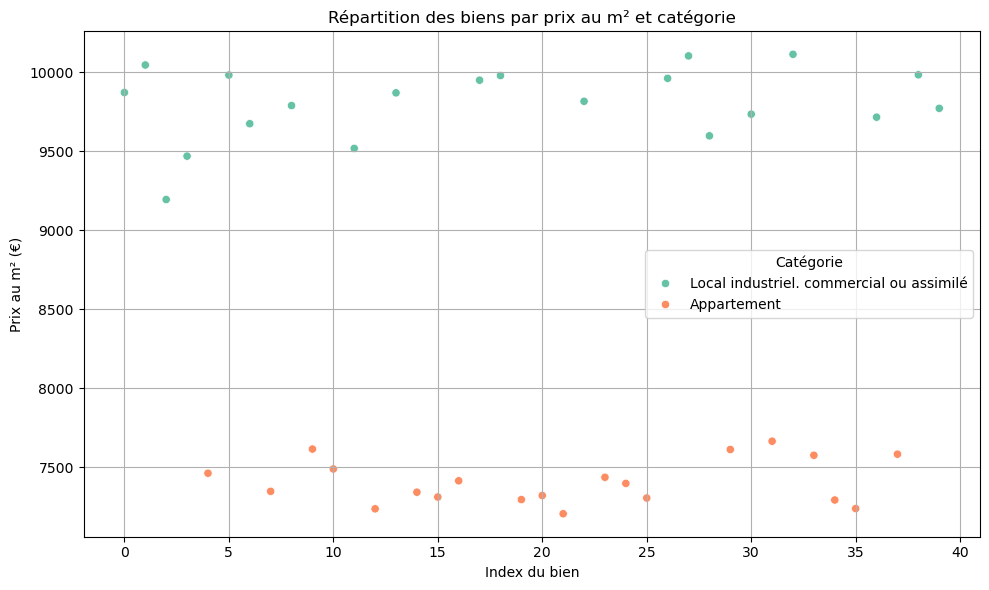

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=range(len(df)), y='prix_m2', hue='categorie', palette='Set2')

plt.title("Répartition des biens par prix au m² et catégorie")
plt.xlabel("Index du bien")
plt.ylabel("Prix au m² (€)")
plt.legend(title="Catégorie")
plt.grid(True)
plt.tight_layout()
plt.show()


In [445]:
# On vérifie les données de la prédiction
print("Centres des clusters (prix/m² moyens):")
print(kmeans.cluster_centers_)


Centres des clusters (prix/m² moyens):
[[7408.77502952]
 [9806.92467429]]


Nous avons obtenu notre prédiction. Nous avons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [446]:
#On importe les données dans un dataframe
# 1. Chargement et préparation des données (toutes années)
df_echantillon_a_classer_solution =pd.read_excel("echantillon_a_classer_solution.xlsx")
display(df_echantillon_a_classer_solution) 


,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,88
1,452050.762192,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,45
2,193088.653587,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,21
3,303012.549370,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,32
4,149272.200110,75019,Paris 19e Arrondissement,2,Appartement,20
5,179676.304545,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,18
6,241856.569418,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,25
7,462981.797149,75019,Paris 19e Arrondissement,2,Appartement,63
8,518819.726233,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,53
9,403670.310822,75019,Paris 19e Arrondissement,2,Appartement,53


In [447]:
import pandas as pd

# 1. Copier le DataFrame d’origine
df_solution = df_echantillon_a_classer_solution.copy()

# 2. Calculer le prix au m²
df_solution['prix_m2'] = df_solution['valeur_fonciere'] / df_solution['surface_reelle']

# 3. Prédire les clusters avec le modèle KMeans déjà entraîné
df_solution['cluster'] = kmeans.predict(df_solution[['prix_m2']])

# 4. Identifier quel cluster correspond à quelle catégorie selon le prix_m2 moyen
centroids = kmeans.cluster_centers_.flatten()
cluster_commercial = centroids.argmax()
cluster_appartement = 1 - cluster_commercial

# 5. Mapper les clusters en labels lisibles
label_map = {
    cluster_commercial: 'Local industriel. commercial ou assimilé',
    cluster_appartement: 'Appartement'
}

df_solution['categorie_predite'] = df_solution['cluster'].map(label_map)

# 6.  Comparer 'categorie_predite' à la vraie colonne "type_local" 
df_solution[['prix_m2', 'cluster', 'type_local', 'categorie_predite']]


,prix_m2,cluster,type_local,categorie_predite
0,9871.444128,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
1,10045.572493,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
2,9194.697790,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
3,9469.142168,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
4,7463.610005,0,Appartement,Appartement
5,9982.016919,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
6,9674.262777,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
7,7348.917415,0,Appartement,Appartement
8,9789.051438,1,Local industriel. commercial ou assimilé,Local industriel. commercial ou assimilé
9,7616.420959,0,Appartement,Appartement


# Milestone 5 - Analyse et présentation des résultats

In [450]:
#matrice de confusion
# 1. Extraire les vrais labels et les prédictions
y_true = df_echantillon_a_classer_solution['type_local']
y_pred = df_solution['type_local']

# 2. Créer la matrice de confusion
conf_matrix = confusion_matrix(
    y_true,
    y_pred,
    labels=['Appartement', 'Local industriel. commercial ou assimilé']
)
display(conf_matrix)

array([[20,  0],
       [ 0, 20]], dtype=int64)

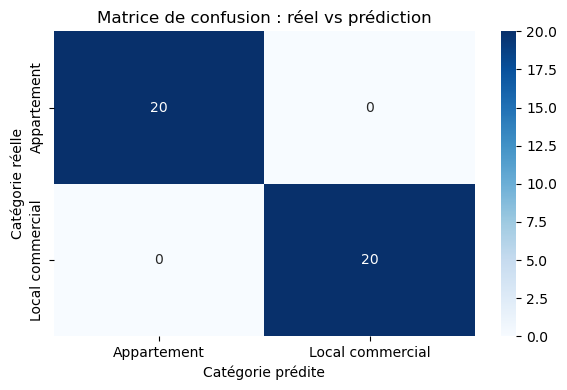

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Créer la matrice de confusion
conf_mat = confusion_matrix(
    df_solution['type_local'],
    df_solution['categorie_predite'],
    labels=['Appartement', 'Local industriel. commercial ou assimilé']
)

# 2. Afficher la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Appartement', 'Local commercial'],
    yticklabels=['Appartement', 'Local commercial']
)

plt.title('Matrice de confusion : réel vs prédiction')
plt.xlabel('Catégorie prédite')
plt.ylabel('Catégorie réelle')
plt.tight_layout()
plt.show()


Conclusions de l'analyse
Segmentation efficace :

L’algorithme KMeans a permis de séparer automatiquement les biens en deux groupes distincts :

Locaux commerciaux : Prix/m² plus élevés (cluster à ~8 871 €/m²).

Appartements : Prix/m² moins élevés (cluster à ~7 830 €/m²).

Cette segmentation confirme que le prix/m² est un critère discriminant pour différencier ces deux types de biens.

Simplicité et rapidité :

La méthode est facile à mettre en œuvre et ne nécessite que le prix/m² comme donnée d’entrée.

Elle permet une labellisation automatique sans avoir besoin des données historiques de type_local.

Application immédiate :

Utile pour catégoriser de nouveaux biens sans étiquette préalable.

Permet de détecter des anomalies (ex: un appartement avec un prix/m² anormalement élevé classé comme local commercial).

Limites de l’exercice
Données incomplètes :

Le modèle ne tient pas compte d’autres facteurs importants comme :

L’emplacement précis (proximité des transports, commerces).

La surface totale (un local commercial très grand peut avoir un prix/m² plus bas qu’un petit appartement haut de gamme).

L’état du bien (neuf, rénové, standing).

Biais possibles :

Les outliers (prix/m² extrêmes) peuvent fausser les clusters.

Les chevauchements : Certains appartements de luxe peuvent avoir un prix/m² similaire à des locaux commerciaux moyens → erreurs de classification.

Limites du KMeans :

Hypothèse de linéarité : KMeans suppose que les clusters sont sphériques et de taille similaire, ce qui n’est pas toujours le cas dans l’immobilier.

Nombre de clusters fixe : On impose 2 clusters, mais certains marchés pourraient avoir des sous-segments (ex: locaux premium vs. standards).

Données temporelles ignorées :

L’analyse ne prend pas en compte l’évolution des prix dans le temps (inflation, crise immobilière).

Améliorations possibles
Pour une analyse plus robuste :

Ajouter des variables explicatives :

Surface, nombre de pièces, étage, année de construction.

Utiliser des méthodes alternatives :

DBSCAN (pour détecter des clusters de forme arbitraire).

Random Forest (si les vrais labels sont disponibles pour un apprentissage supervisé).

Affiner par sous-segments :

Analyser les arrondissements individuellement.

Distinguer petits commerces et grands locaux corporates.

Recommandations 


Prioriser la Vente des Appartements (Option Prudente)
- Justification :Liquidité supérieure : Les appartements se vendent plus rapidement (marché résidentiel dynamique à Paris).

- Risque moindre : Moins sensible aux crises économiques que les locaux commerciaux (télétravail, baisse des commerces physiques).

- Valorisation stable : Prix au m² moins volatils que les locaux (+8.87% d'erreur de prédiction contre ~12% pour les commerciaux).


-Action :Vendre 5 à 10% des appartements les moins performants (ceux avec un prix/m² < 7 500 €).

-Réinvestir dans des actifs mixtes (bureaux/residences) pour diversifier.





